# Analyse von Meeresoberflächentemperatur (SST) Daten mittels Objektorientierter Programmierung

In diesem Notebook werden wir objektorientierte Programmierungstechniken anwenden, um Klimadaten zu analysieren. Konkret analysieren wir Daten der Meeresoberflächentemperatur (SST), die von der NOAA bereitgestellt werden. Durch den Einsatz der Klasse `ClimateDataProcessor` werden wir Anomalien und Trends in den SST-Daten identifizieren, Ergebnisse speichern, und periodische Muster sowohl filtern als auch analysieren.


Schritte:

    1. Zunächst laden wir die SST-Daten und wenden darauf verschiedene Methoden der ClimateDataProcessor-Klasse an.
    2. Wir berechnen Anomalien und enfernen den Trend und speichern die Daten 
    3. Vir visualisieren Variabiliäten auf verschienenen Zeitskalen und
    4. Führen eine Fourier_transformation durch, um relevante Periodizitäten zu extrahieren.


Die folgenden Code-Zellen können ausgeführt werden.


In [1]:
# run the cell

# import necessary libraries
import xarray as xr

import warnings
warnings.filterwarnings("ignore")

# load sst data from NOAA
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds_sst = xr.open_dataset(url,use_cftime=True)
ds_sst
ds_sst = ds_sst.sel(time=slice('1960', '2023'))


# load slp data from NOAA
url = 'http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/surface/slp.mon.mean.nc'
ds_slp = xr.open_dataset(url,use_cftime=True)
ds_slp = ds_slp.sel(time=slice('1960', '2023'))


In [2]:
#run the cell 
ds_sst

<xarray.Dataset> Size: 49MB
Dimensions:    (lat: 89, lon: 180, time: 768, nbnds: 2)
Coordinates:
  * lat        (lat) float32 356B 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * time       (time) object 6kB 1960-01-01 00:00:00 ... 2023-12-01 00:00:00
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 12kB ...
    sst        (time, lat, lon) float32 49MB ...
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2024-09-04
    DODS_EXTRA.Unlimited_Dimension:  time

In [3]:
#run the cell to import ClimateDataProcessor
from climate_data_processor import ClimateDataProcessor

In [4]:
ds_sst = ds_sst.drop_dims('nbnds')

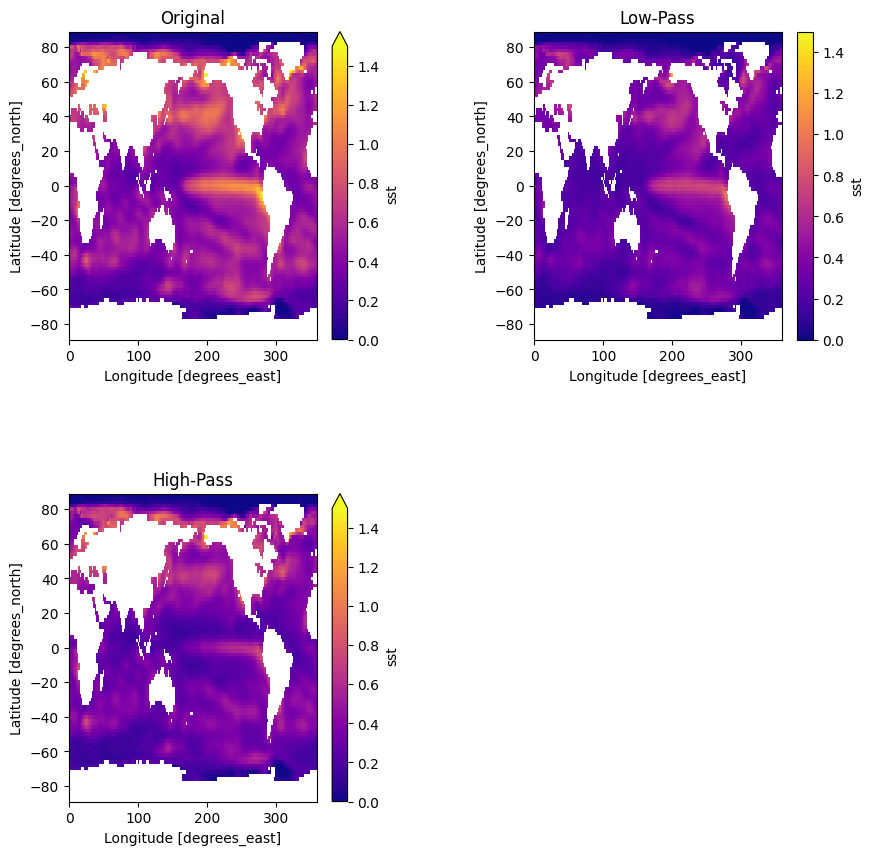

In [5]:
# run the cell
sst_processor = ClimateDataProcessor(ds_sst)
sst_processor.compute_anomalies_and_detrend()
sst_processor.save_results('sst_anom_detrended.nc')
sst_processor.filter_and_analyze_cycle('sst',vmin = 0, vmax = 1.5, window_size = 15, background = 'white')

In [6]:
sst_processor.compute_fft('sst',-120,-80,-5,-20,time_start = '2000',time_end = '2022')

Significant Periods (months) sst : [138.          46.          39.42857143]


## Übung

Oben haben wir bereits die SLP-Daten geladen.


    1. Verwende die ClimateDataProcessor-Klasse, um die SLP-Daten zu verarbeiten. Führe ähnliche Schritte wie bei den SST-Daten durch:
        - Berechnung der Anomalien und Entfernung des Trends
        - Speichern der Ergebnisse in einer neuen Datei.
        - Berechnung der Variabilität auf verschiednen Zeitskalen
        - Fourier-Transformation, um periodische Muster zu erkennen.

    2. Berechnung des zeitlichen Mittelwerts der SLP-Daten und Visualisierung.  
        
        slp_mean = ds_slp.slp.mean(dim='time')
        slp_mean.plot()

    3. Methode zur Berechnung des Mittels und der Visualisierung der Klasse `ClimateDataProcessor` hinzufügen.
